# Колебания математического маятника

### TODO:
* Получите аналитические решения уравнения затухающих колебаний с учетом начальных условий.

Рассмотрим движение математического маятника - материальной точки массы $m$, подвешаенной на нити длины $l$, совершающей затухающие колебания в поле силы тяжести с ускорением свободного падения $g$. Сила сопротивления пропорциональна скорости точки $\vec{F}_c = -\beta \vec{v}$, где $\beta$ - коэффициент сопротивления. Уравнение затухающих колебаний такого маятника имеет вид $$ \frac{d^2 \theta}{dt^2} + 2 \delta \frac{d \theta}{dt} + \omega_0^2 \theta = 0,$$ где $\theta$ - угол отклонения от положения равновесия, $\omega_0 = \sqrt{g/l}$ - собственная частота колебаний математического маятника, $\delta = \beta/(2m)$ - коэффициент затухания. В начальный момент времени угол отклонения равен $\theta(0) = \theta_0$, начальная угловая скорость вращения маятника $d\theta / dt (0) = \dot{\theta}_0$.

Для решения дифференциального уравнения колебаний математического маятника второго порядка рассмотрим систему двух уравнений первого порядка для угла отклонения и угловой скорости: $$ \frac{d \theta}{dt} = \dot{\theta} = x[1], \\ \frac{d \dot{\theta}}{dt} = - 2 \delta \dot{\theta} - \omega_0^2 \theta = - 2 \delta x[1] - \omega_0^2 x[0].$$ Вектор $x = [\theta(t), \dot{\theta}(t)]$ содержит в себе и угол отклонения и угловую скорость в качестве компонент. Функция rhs (right hand side) определяет правые части дифференциальных уравнений и имеет следующее представление в python.

In [3]:
def rhs(x, t, delta, omega):
    return [x[1], -2.*delta*x[1]-omega**2*x[0]]

Определим параметры задачи $\delta = 0.3, \omega_0 = 1.0$ и временной промежуток. Для численного интегрирования полученной задачи с начальными условиями воспользуемся библиотечной функцией [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) модуля scipy.integrate.

In [89]:
from scipy.integrate import odeint
from numpy import linspace, array
delta = 0.6
omega = 2.0
time = linspace(0,3,30000)
x0 = array([0.1,0])
out = odeint(rhs, x0, time, args=(delta, omega))

Для построения графиков изменения со временем угла поворота и угловой скорости воспользуется библиотекой matplotlib, в частности для включения графиков в jupyter notebook подключим "магическую" команду [%matplotlib inline](http://qaru.site/questions/117800/purpose-of-matplotlib-inline).

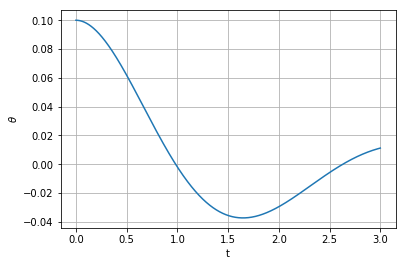

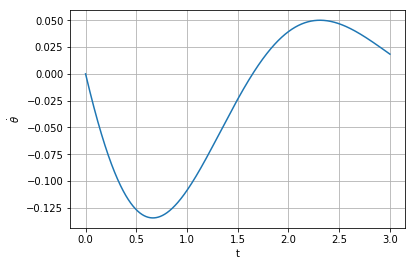

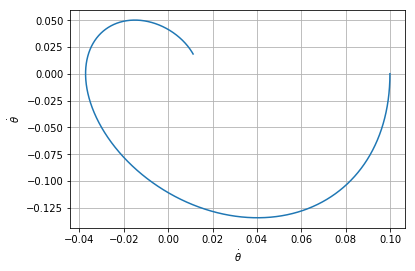

In [87]:
from pylab import show, plot, xlabel, ylabel, grid, legend
%matplotlib inline
grid()
xlabel('t')
ylabel(r'$\theta$')
plot(time, out[:,0])
show()
grid()
xlabel('t')
ylabel(r'$\dot{\theta}$')
plot(time, out[:,1])
show()
grid()
xlabel(r'$\dot{\theta}$')
ylabel(r'$\dot{\theta}$')
plot(out[:,0], out[:,1])

Как известно, уравнение затухающих колебаний допускают 3 типа решений: колебательный режим и две реализации апериодического движения. $$ \theta(t) = e^{-\delta t}(C_1 \cos (\sqrt{\omega_0^2 - \delta^2} t) + C_2 \sin (\sqrt{\omega_0^2 - \delta^2} t)), \text{ при }\omega_0 > \delta, \\ \theta(t) = C_1 e^{\gamma_1 t} + C_2 e^{\gamma_2 t}, \text{ при } \omega_0 < \delta, \\ \theta(t) = C_1 e^{-\delta t} + C_2 te^{-\delta t}, \text{ при } \omega_0 = \delta,$$ где $ \gamma_1 = -\delta + \sqrt{\delta^2 - \omega_0^2},  \gamma_2 = -\delta - \sqrt{\delta^2 - \omega_0^2}$.

В случае затухающих колебаний константы $C_1, C_2$ определяются следующим образом $C_1 = \theta_0, C_2 = (\theta_0 \delta + \dot{\theta}_0)/\sqrt{\omega_0^2 - \delta^2}$. Получите эти выражения самостоятельно.
Аналитические значения колеблющейся величины определеются так:

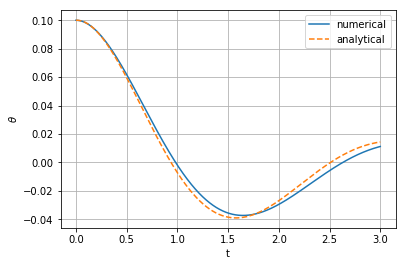

In [90]:
from numpy import exp, sin, cos
C1 = x[0]
C2 = (x0[0]*delta + x0[1])/(omega**2 - delta**2)**0.5
thetaAnalytic = exp(-delta*time)*(C1*cos(omega*time)+C2*sin(omega*time))
grid()
xlabel('t')
ylabel(r'$\theta$')
plot(time, out[:,0], label='numerical')
plot(time, thetaAnalytic, '--', label='analytical')
legend()

Теория Флоке, комплексный жук

In [63]:
from numpy import arange
from numpy.linalg import eig
deltas = arange(0.1,1.5,0.1)
omega = 1.0
time = linspace(0,3,201)
x0 = array([1,0])
x1 = array([0,1])
for delta in deltas:
    thetaAnalytic0 = exp(-delta*time)*(x0[0]*cos(omega*time)+(x0[0]*delta + x0[1])/(omega**2 - delta**2)**0.5*sin(omega*time))
    thetaAnalytic0 = exp(-delta*time)*(x1[0]*cos(omega*time)+(x1[0]*delta + x1[1])/(omega**2 - delta**2)**0.5*sin(omega*time))
    #out0 = odeint(rhs, x0, time, args=(delta, omega))
    #out1 = odeint(rhs, x1, time, args=(delta, omega))
    M = array([[thetaAnalytic0[200,0], out0[200,1]], [out1[200,0], out1[200,1]]])
    w, v = eig(M)
    print(delta, w[0])

0.1 (-0.7317495428819596+0.11556076858589051j)
0.2 (-0.5376302777988131+0.11021780101869792j)
0.30000000000000004 (-0.3907612898371472+0.11226991661570186j)
0.4 (-0.2783422696474065+0.11508060362091592j)
0.5 (-0.19097608728581955+0.11539148485264603j)
0.6 (-0.12189034233875856+0.11165330732110548j)
0.7000000000000001 (-0.06624959387630759+0.10298819267260262j)
0.8 (-0.02061130928113709+0.0883454630789558j)
0.9 (0.01748019673883237+0.06489240659402845j)
1.0 (0.049787069329498945+7.261005474990387e-06j)
1.1 0.14584260439235824
1.2000000000000002 0.19988259187067367
1.3000000000000003 0.24462891703348116
1.4000000000000001 0.2834803958708286


Ползунки

Анимация